# Gerar gráficos utilizados no artigo

## Configuração do ambiente

In [1]:
# Listar locales instalados
!locale -a

C
C.UTF-8
en_US.utf8
POSIX
pt_BR
pt_BR.iso88591


In [2]:
# Instalar o locale pt_BR
!/usr/share/locales/install-language-pack pt_BR
!dpkg-reconfigure locales

Generating locales (this might take a while)...
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.ISO-8859-1... done
Generation complete.


In [3]:
# Listar locales instalados
!locale -a

C
C.UTF-8
en_US.utf8
POSIX
pt_BR
pt_BR.iso88591


In [ ]:
# Reinicar o processo do python para enxergar o locale pt_BR
import os
os.kill(os.getpid(), 9)
# A execução do notebook será interrompida
# Será necessário disparar nova executação a partir da célula abaixo (CTRL+F10)

In [1]:
# Ignorar alerta de itens depreciados
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Definir o locale pt_BR
import locale
locale.setlocale(locale.LC_NUMERIC, 'pt_BR.ISO8859-1')

'pt_BR.ISO8859-1'

## Código

### Pacotes utilizados

In [3]:
# pacotes utilizados
import pandas as pd                         # Utilizado para ler os CSVs dos resultados
import matplotlib.pyplot as plt             # Utilizado para ajustar as legendas dos gráficos

from collections.abc import Sequence        # Type hint nas funções que aceitam arranjos

### Definições

In [4]:
URL_CSV_RESULTADOS_PT1 = 'https://github.com/rsn86/edaa-02/raw/main/pt1/resultados/resultados-todos.csv'
URL_CSV_RESULTADOS_PT2 = 'https://github.com/rsn86/edaa-02/raw/main/pt2/resultados/resultados-todos.csv'

In [5]:
df_pt1 = pd.read_csv(
    URL_CSV_RESULTADOS_PT1,
    sep=';',
    usecols=['tamanho_arranjo', 'rodada', 'metodo', 'comparacoes', 'tempo', 'cenario']
)

In [7]:
df_pt2 = pd.read_csv(
    URL_CSV_RESULTADOS_PT2,
    sep=';',
    usecols=['tamanho_arranjo', 'rodada', 'metodo', 'comparacoes', 'tempo', 'cenario']
)

In [9]:
df = df_pt1.append(df_pt2, ignore_index=True)

In [10]:
def peparar_dados_grafico(df: pd.DataFrame, cenario: str) -> pd.DataFrame:
  return \
    df[df['cenario'] == cenario].\
      groupby(
        ['tamanho_arranjo', 'metodo']
      )[['tempo', 'comparacoes']].\
      describe(
        percentiles=[]
      ).\
      reset_index().\
      replace({
        ('metodo', ''): {'Arvore': 'Árvore'}
      })

In [11]:
df_pior_caso = peparar_dados_grafico(df, 'Pior Caso')

In [12]:
df_aleatorio = peparar_dados_grafico(df, 'Aleatório')

In [13]:
def gerar_grafico(df: pd.DataFrame, values: tuple, ylabel: str, filename: str, style: Sequence):
  df.\
    pivot(
      index=['tamanho_arranjo'],
      columns='metodo',
      values=values
    ).\
    plot(
      logy=True,
      xticks=range(100_000, 1_000_000+1, 100_000),
      xlabel='Tamanho do Arranjo',
      ylabel=ylabel,
      legend=False,
      style=style,
      lw=3.0
    )
  plt.legend(
    bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
  plt.savefig(filename)

In [14]:
# Padrão de cores utilizado nas linhas dos gráficos
style={
    'Binária': 'g*-',     # Linha verde, sólida, com marcadores estrela
    'Lista': 'bD-',       # Linha azul, sólica, com marcadores diamante
    'Por saltos': 'ks-',  # Linha preta, sólica, com marcadores quadrado
    'Sequencial': 'yo-.', # Linha amarela, traço-pontilhada, com maradores círculo
    'Árvore': 'r|:'       # Linha vermelha, pontilhada, com marcadores barra
}

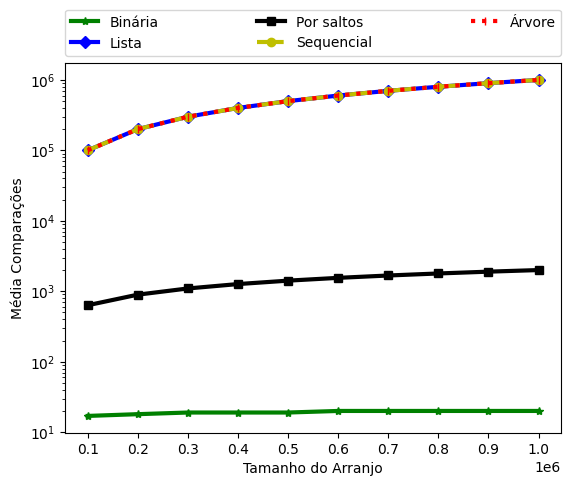

In [15]:
gerar_grafico(
  df_pior_caso,
  values=('comparacoes', 'mean'),
  ylabel='Média Comparações',
  filename='comparacoes-pior_caso.svg',
  style=style
)

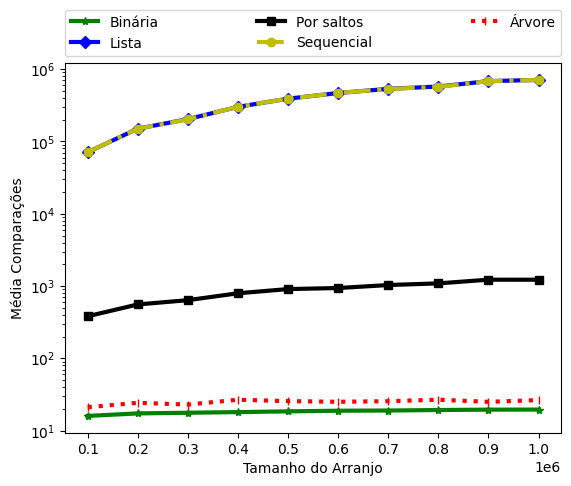

In [16]:
gerar_grafico(
  df_aleatorio,
  values=('comparacoes', 'mean'),
  ylabel='Média Comparações',
  filename='comparacoes-aleatorio.svg',
  style=style
)

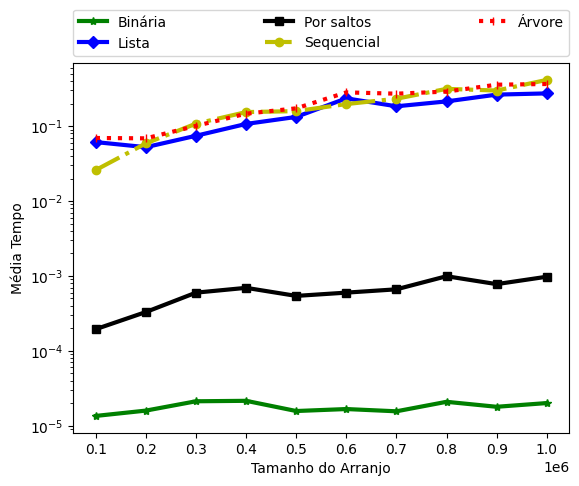

In [17]:
gerar_grafico(
  df_pior_caso,
  values=('tempo', 'mean'),
  ylabel='Média Tempo',
  filename='tempo-pior_caso.svg',
  style=style
)

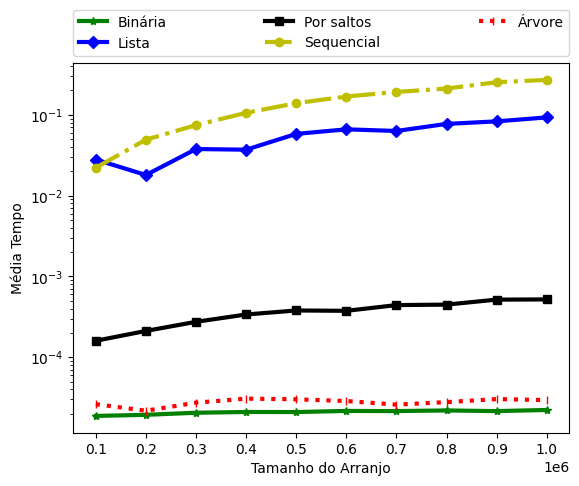

In [18]:
gerar_grafico(
  df_aleatorio,
  values=('tempo', 'mean'),
  ylabel='Média Tempo',
  filename='tempo-aleatorio.svg',
  style=style
)